# Beyond Bitswap Test Bed
Run your testbed experiments here.  Execute the first two cells and you will be
prompted the dashboard and the output to start running experiments.

In [1]:
import ui
import ipywidgets as widgets
import utils

l = ui.Layout()
output = widgets.Output()
testid = ""
def on_button_clicked(b):
    with output:
        print("##############")
        testid = utils.runner(utils.process_layout_config(l))
        print("TestID to process data: " + testid)

l.runButton.on_click(on_button_clicked)
display(output)

Output()

In [2]:
l.show()

GridspecLayout(children=(Text(value='', description='Testcase', layout=Layout(grid_area='widget001')), Text(va…

### Collect and process your results.
If you want to process in this notebook any of the experiments from above, copy
their task id and start running the cells below according to the results you want
to check.

In [3]:
import ui
lp = ui.ProcessLayout()
lp.show()

GridspecLayout(children=(Text(value='', description='Test ID', layout=Layout(grid_area='widget001')),), layout…

In [4]:
import process
import utils

# Collecting the data.
utils.collect_data(l, lp.testid.value)

agg, testcases = process.aggregate_results('./results')
byLatency = process.groupBy(agg, "latencyMS")
byNodeType = process.groupBy(agg, "nodeType")
byFileSize = process.groupBy(agg, "fileSize")
byBandwidth = process.groupBy(agg, "bandwidthMB")
byTopology = process.groupBy(agg, "topology")

Cleaning previous runs..

Oct 26 09:13:43.861285	INFO	using home directory: /home/adlrocha/testground
Oct 26 09:13:43.861405	INFO	.env.toml loaded from: /home/adlrocha/testground/.env.toml
Oct 26 09:13:43.861413	INFO	testground client initialized	{"addr": "http://localhost:8042"}

>>> Result:

Oct 26 09:13:43.863424	INFO	created file: bub963l23084pljmes30.tgz

bub963l23084pljmes30/.
bub963l23084pljmes30/single
bub963l23084pljmes30/single/0
bub963l23084pljmes30/single/0/diagnostics.out
bub963l23084pljmes30/single/0/results.out
bub963l23084pljmes30/single/0/run.err
bub963l23084pljmes30/single/0/run.out
bub963l23084pljmes30/single/1
bub963l23084pljmes30/single/1/diagnostics.out
bub963l23084pljmes30/single/1/results.out
bub963l23084pljmes30/single/1/run.err
bub963l23084pljmes30/single/1/run.out



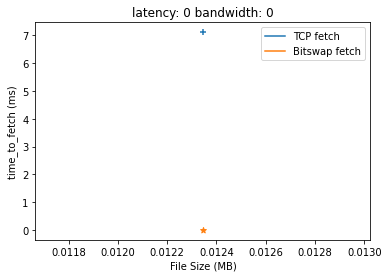

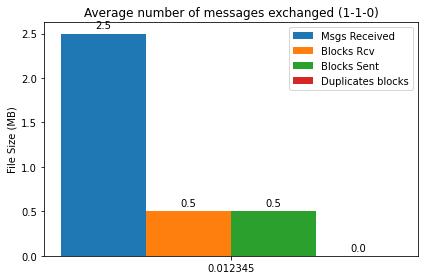

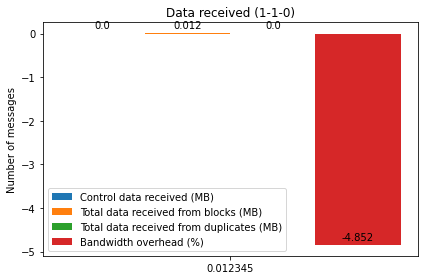

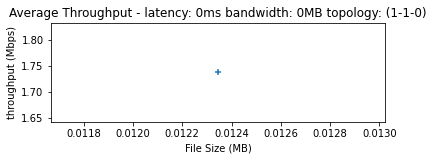

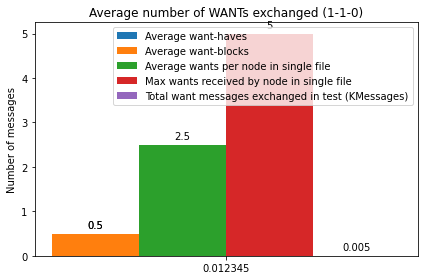

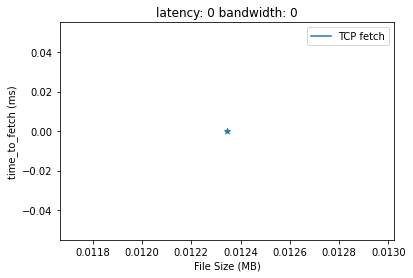

In [5]:
process.plot_latency(byLatency, byBandwidth, byFileSize)
process.plot_messages(byFileSize, byTopology)
process.plot_bw_overhead(byFileSize, byTopology)
process.plot_througput(byLatency, byBandwidth, byFileSize, byTopology, testcases)
process.plot_want_messages(byFileSize, byTopology)
process.plot_tcp_latency(byLatency, byBandwidth, byFileSize)

In [6]:
process.output_latency(byFileSize, byTopology)
process.output_avg_data(byFileSize, byTopology, "Seed")
process.output_avg_data(byFileSize, byTopology, "Leech")

=== Time to fetch ====
[*] Topology:  (1-1-0)
[*]Filesize: 0.012345 MB
Avg. Time to Fetch: 7.111 ms
=== Data Exchanges for Seed ===
[*] Topology:  (1-1-0)
[*]Filesize: 0.012345 MB
Avg. Data In: 0.0 MB
Avg. Data Out: 0.0 MB
Avg. Rate In: 0.0 MBps
Avg. Rate Out: 0.0 MBps
=== Data Exchanges for Leech ===
[*] Topology:  (1-1-0)
[*]Filesize: 0.012345 MB
Avg. Data In: 0.016 MB
Avg. Data Out: 0.003 MB
Avg. Rate In: 0.0 MBps
Avg. Rate Out: 0.0 MBps
